<h1>Data Preprocessing</h1>


In [1]:
import pandas as pd

df = pd.read_csv("human_entry_suggestions 3.csv")
df.head()

,column_name,unique_value,replacement_value,delete_value,suggested_value,new_column_name,new_column_value,new_column_name.1,new_column_value.1,delete_column_value
0,h1_income_other_specify,Tailoring,Tailor,False,NaN,h1_income_other_specify_reclassification,h1_income_business_amt,NaN,NaN,NaN
1,h1_income_other_specify,Driver,NaN,False,NaN,h1_income_other_specify_reclassification,h1_income_wages_amt,NaN,NaN,NaN
2,h1_income_other_specify,Ammavadi,NaN,False,NaN,h1_income_other_specify_reclassification,h1_income_govt_amt,NaN,NaN,NaN
3,h1_income_other_specify,Lari Driver,Lorry Driver,False,NaN,h1_income_other_specify_reclassification,h1_income_wages_amt,NaN,NaN,NaN
4,h1_income_other_specify,Travels,NaN,False,NaN,h1_income_other_specify_reclassification,h1_income_business_amt,NaN,NaN,NaN


In [2]:
listOfColumnNames = []
for i in range(len(df)):
  listOfColumnNames.append(df.iloc[i]["column_name"])

In [3]:
listOfColumnNames = list(set(listOfColumnNames))


In [4]:
unique_values_dict = {}

for _, row in df.iterrows():
    column_name, unique_value = row['column_name'], row['unique_value']
    if column_name in unique_values_dict:
        if unique_value not in unique_values_dict[column_name]:
            unique_values_dict[column_name].append(unique_value)
    else:
        unique_values_dict[column_name] = [unique_value]
unique_values_dict


{'h1_income_other_specify': ['Tailoring',
  'Driver',
  'Ammavadi',
  'Lari Driver',
  'Travels',
  'Contract worker',
  'Bullero (auto)',
  'Dairy',
  'Millets&bullero',
  'Chakali ( battalu wash)',
  'Tractor',
  'Lari',
  'Tailor',
  'Auto',
  'Cloths Iron',
  'Track tar',
  'Lari driver',
  'RMP Docter',
  'Tracter',
  'NREGS',
  'Chepalu pattadam',
  '24000'],
 'h1_exp_other_specify': ['Beedi'],
 'h3_crop1other': ['Yaragadd',
  'Dhaniyalu',
  'Nimma',
  'Pasuvula gaddi(sappa)',
  'Brinjal',
  'Bengal gram',
  'Coriander',
  'Daniyalu'],
 'h3_crop1otherpaddy': ['Sona', 'JJL'],
 'h3_crop1othercereal': ['Horsegram', 'Nuvulu'],
 'h3_crop1otherpulse': ['Senagalu', 'Corn', 'Senaga', 'Hursgram'],
 'h3_crop1otherfruit': ['Sannimma',
  'Sweet lemon 1',
  'Nimma',
  'Lemon',
  'Sweet lemon'],
 'h3_crop1othervegetable': ['Carrot', 'Brinjal'],
 'h3_crop1otheroilseed': ['Pamaroja oil', 'Amudham'],
 'h3_crop1_lossother': ['Aakumachha tegulu',
  'Verukullu thegulu',
  'Pogamanchu valana putha ra

<h1> Approach 1: Using FuzzyWuzzy + Levensthein Distance


In [5]:
!pip install fuzzywuzzy

  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata


In [7]:
list_of_column_names = df['column_name'].unique().tolist()

unique_values_dict = {}
for _, row in df.iterrows():
    column_name, unique_value = row['column_name'], row['unique_value']
    if column_name in unique_values_dict:
        if unique_value not in unique_values_dict[column_name]:
            unique_values_dict[column_name].append(unique_value)
    else:
        unique_values_dict[column_name] = [unique_value]
from fuzzywuzzy import process

def group_by_similarity(values, threshold=80):#Levensthein Distance similarity threshold = 80
    groups = []
    used = {}

    for value in values:
        if value in used and used[value] >= threshold:
            continue

        matches = process.extract(value, values, limit=None)
        similar = [match[0] for match in matches if match[1] >= threshold]

        # Update the dictionary with the similarity scores
        for s in similar:
            if s in used:
                used[s] = max(used[s], matches[0][1])
            else:
                used[s] = matches[0][1]

        # Add the group of similar values to the final list
        groups.append(similar)

    return groups
for column in unique_values_dict:
    unique_values_dict[column] = [str(value) for value in unique_values_dict[column] if pd.notnull(value)]

linguistically_similar_groups = {column: group_by_similarity(values) for column, values in unique_values_dict.items()}
linguistically_similar_groups


{'h1_income_other_specify': [['Tailoring', 'Tailor'],
  ['Driver', 'Lari Driver', 'Lari driver'],
  ['Ammavadi'],
  ['Travels'],
  ['Contract worker'],
  ['Bullero (auto)', 'Auto'],
  ['Dairy'],
  ['Millets&bullero'],
  ['Chakali ( battalu wash)'],
  ['Tractor', 'Tracter'],
  ['Lari', 'Lari Driver', 'Lari driver'],
  ['Cloths Iron'],
  ['Track tar'],
  ['RMP Docter'],
  ['NREGS'],
  ['Chepalu pattadam'],
  ['24000']],
 'h1_exp_other_specify': [['Beedi']],
 'h3_crop1other': [['Yaragadd'],
  ['Dhaniyalu', 'Daniyalu'],
  ['Nimma'],
  ['Pasuvula gaddi(sappa)'],
  ['Brinjal'],
  ['Bengal gram'],
  ['Coriander']],
 'h3_crop1otherpaddy': [['Sona'], ['JJL']],
 'h3_crop1othercereal': [['Horsegram'], ['Nuvulu']],
 'h3_crop1otherpulse': [['Senagalu', 'Senaga'], ['Corn'], ['Hursgram']],
 'h3_crop1otherfruit': [['Sannimma', 'Nimma'],
  ['Sweet lemon 1', 'Sweet lemon', 'Lemon']],
 'h3_crop1othervegetable': [['Carrot'], ['Brinjal']],
 'h3_crop1otheroilseed': [['Pamaroja oil'], ['Amudham']],
 'h3_crop

<h1> Approach 2: Using NLTK </h2>

In [8]:
!pip install nltk

In [9]:
!python -m nltk.downloader popular

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/miaanand/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/miaanand/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/miaanand/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/miaanand/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/miaanand/nltk_data...
[nltk_data]    |   Unzipping corpora/ina

In [13]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')

example_column = 'h1_income_other_specify'
example_values = unique_values_dict[example_column]

def get_primary_noun(phrase):
    words = nltk.word_tokenize(phrase)
    return words[-1] if words else None

primary_nouns = [get_primary_noun(value) for value in example_values]

def find_similar_words(word, words):
    word_synsets = wn.synsets(word)
    if not word_synsets:  # If no synsets are found for the word, return empty list
        return []

    similar_words = []
    for target_word in words:
        target_synsets = wn.synsets(target_word)
        if not target_synsets:
            continue

        max_similarity = max((wn.path_similarity(ws, tws) or 0) for ws in word_synsets for tws in target_synsets)
        if max_similarity > 0.2:  # Threshold is subjective, can be adjusted
            similar_words.append((target_word, max_similarity))

    similar_words.sort(key=lambda x: x[1], reverse=True)
    return similar_words

example_word = primary_nouns[0]  
similar_words_example = find_similar_words(example_word, primary_nouns)

similar_words_example


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[('Tailoring', 1.0), ('Tailor', 1.0)]

In [16]:
# Function to group words by semantic similarity using NLTK's WordNet
def group_by_semantic_similarity(words):
    grouped_words = []
    used_words = set()

    for word in words:
        if word in used_words:
            continue

        # Find similar words for the current word
        similar_words = find_similar_words(word, [w for w in words if w not in used_words])

        # If similar words are found, mark them as used and add to the groups
        if similar_words:
            similar_words_list = [word] + [w[0] for w in similar_words]
            grouped_words.append(similar_words_list)
            used_words.update(similar_words_list)
        else:
            grouped_words.append([word])
            used_words.add(word)

    return grouped_words

# Apply grouping to all columns
semantic_groups_dict = {}
for column, values in unique_values_dict.items():
    primary_nouns_column = [get_primary_noun(value) for value in values if get_primary_noun(value)]
    semantic_groups_dict[column] = group_by_semantic_similarity(primary_nouns_column)

semantic_groups_dict


{'h1_income_other_specify': [['Tailoring', 'Tailoring', 'Tailor'],
  ['Driver', 'Driver', 'Driver', 'driver', 'worker', 'Iron'],
  ['Ammavadi'],
  ['Travels', 'Travels'],
  [')'],
  ['Dairy', 'Dairy'],
  ['bullero'],
  ['Tractor', 'Tractor', 'Auto'],
  ['Lari', 'Lari'],
  ['tar', 'tar'],
  ['Docter'],
  ['Tracter'],
  ['NREGS'],
  ['pattadam'],
  ['24000']],
 'h1_exp_other_specify': [['Beedi']],
 'h3_crop1other': [['Yaragadd'],
  ['Dhaniyalu'],
  ['Nimma'],
  [')'],
  ['Brinjal', 'Brinjal', 'Coriander'],
  ['gram', 'gram'],
  ['Daniyalu']],
 'h3_crop1otherpaddy': [['Sona'], ['JJL']],
 'h3_crop1othercereal': [['Horsegram'], ['Nuvulu']],
 'h3_crop1otherpulse': [['Senagalu'],
  ['Corn', 'Corn'],
  ['Senaga'],
  ['Hursgram']],
 'h3_crop1otherfruit': [['Sannimma'],
  ['1', '1'],
  ['Nimma'],
  ['Lemon', 'Lemon', 'lemon']],
 'h3_crop1othervegetable': [['Carrot', 'Carrot', 'Brinjal']],
 'h3_crop1otheroilseed': [['oil', 'oil'], ['Amudham']],
 'h3_crop1_lossother': [['tegulu'], ['thegulu'], ['p

<h1> Approach 3: Using Word2Vec Embeddings </h1>

In [13]:
!pip install transformers
!pip install gensim

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/06/4d/8d2dd5d81afdea2aa790860d5c7e12f80154923ba827e3fa36759f0bf2cd/FuzzyTM-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/f0/fe/b899a3d9a18c9a44a35155c79a4c152cb85990ea38ce6ab7e

In [15]:
import gensim.downloader as api

# Load pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [17]:
!pip install scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [18]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def column_to_embeddings(df, column_name, model):
    """Converts a column of text data into a list of embeddings."""
    texts = df[column_name].dropna().unique()
    embeddings = []
    for text in texts:
        words = gensim.utils.simple_preprocess(text)
        embeddings.append(get_average_word2vec(words, model))
    return texts, np.array(embeddings)

def find_optimal_clusters(embeddings, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(embeddings)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()


In [20]:
!pip install gensim

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Processing column: column_name


/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwar

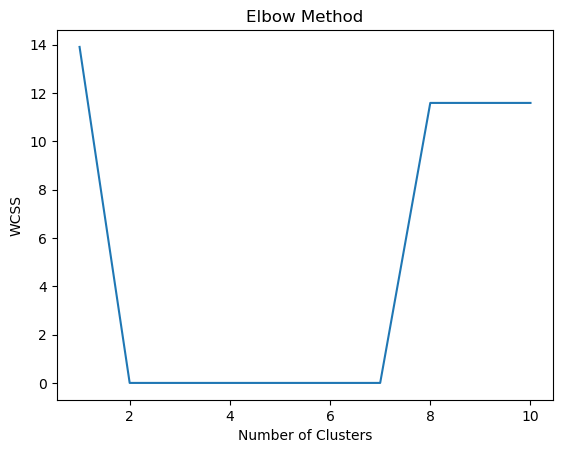

/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustered texts for column 'column_name': {0: ['h1_income_other_specify', 'h1_exp_other_specify', 'h3_crop1otherpaddy', 'h3_crop1othercereal', 'h3_crop1otherpulse', 'h3_crop1otherfruit', 'h3_crop1othervegetable', 'h3_crop1otheroilseed', 'h3_crop1_lossother', 'h3_crop1soldunit_oth', 'h3_crop2otherpaddy', 'h3_crop2othercereal', 'h3_crop2otherpulse', 'h3_crop2otherfruit', 'h3_crop2othervegetable', 'h3_crop2_lossother', 'h3_crop3othercereal', 'h3_crop3othervegetable', 'h3_crop4othervegetable', 'h3_kgcrop1othercereal', 'h3_kgcrop1othervegetable', 'h3_kgcrop1otheroilseed', 'h2_income_other_specify', 'h4_crop1othercereal', 'h4_crop1othercotton', 'h4_crop1otherfruit', 'h4_crop1otheroilseed', 'h4_crop1otherpulse', 'h4_crop1othervegetable', 'h4_crop2othercereal'], 1: ['h3_crop1other', 'h3_crop2other', 'h3_crop3other', 'h3_crop4other', 'h4_crop1other', 'h4_crop2other']}
Processing column: unique_value


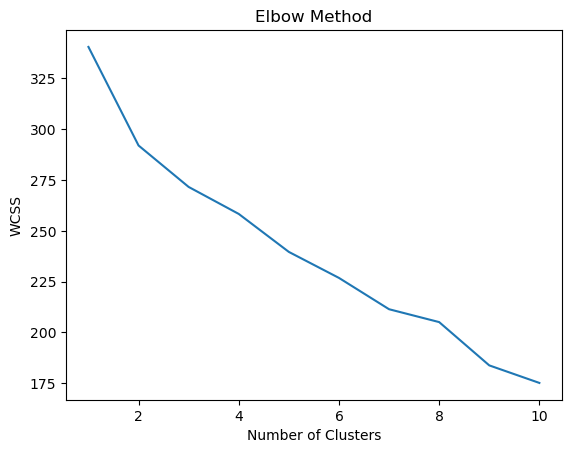

/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustered texts for column 'unique_value': {0: ['Tailoring', 'Driver', 'Ammavadi', 'Lari Driver', 'Travels', 'Contract worker', 'Bullero (auto)', 'Chakali ( battalu wash)', 'Lari', 'Tailor', 'Auto', 'Track tar', 'Lari driver', 'RMP Docter', 'Tracter', 'NREGS', 'Chepalu pattadam', '24000', 'Yaragadd', 'Dhaniyalu', 'Nimma', 'Pasuvula gaddi(sappa)', 'Daniyalu', 'JJL', 'Horsegram', 'Nuvulu', 'Senagalu', 'Senaga', 'Hursgram', 'Sannimma', 'Pamaroja oil', 'Amudham', 'Aakumachha tegulu', 'Verukullu thegulu', 'Pogamanchu valana putha rarli poindi', 'Kayakulllu thegulu', 'Mojaek thegulu', '28', 'Tons', 'Mokka jonna', 'Godhuma', 'Mokaajonna', 'Vuddhulu', 'No', 'Leady finger (benda)', 'Betroot', 'Avisha', 'Angadi', 'Laridriver', 'RMP Doctor', 'Paladairy', 'Bollero', 'Tractor&Bollero', 'Vudhulu', 'Korra', 'Mokkajonna', 'Vakka chetlu', 'Sabja', 'Jonna', 'Mokkajona', 'Mokajonna', 'Mokaajona', 'Sreeram', 'Correct', 'Kakara'], 1: ['Dairy', 'Millets&bullero', 'Tractor', 'Cloths Iron', 'Beedi', 'Brinjal'

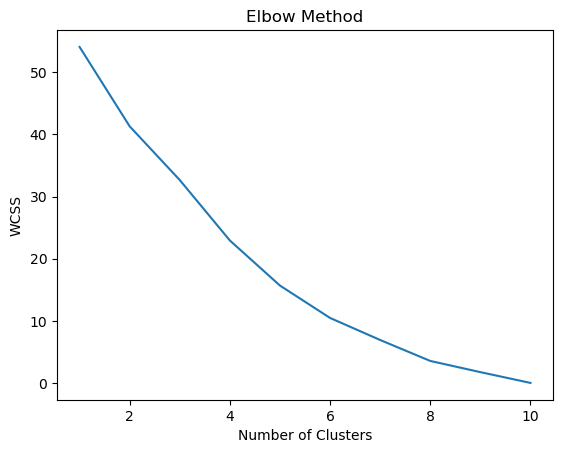

Clustered texts for column 'replacement_value': {0: ['Tailor', 'Bolero Driver', 'Laundry Work', 'Laundry Work\n', 'Fishing', 'Senagalu', 'Pickles Business'], 1: ['Lorry Driver', 'Tractor', 'Tractor, Dairy', 'Dairy']}
Processing column: delete_value


/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


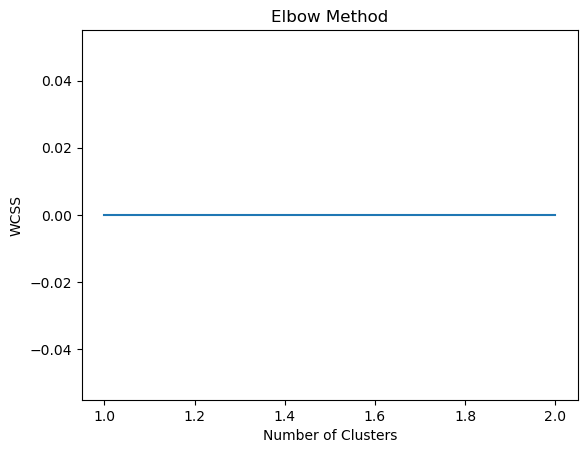

/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Clustered texts for column 'delete_value': {0: [False, True]}
Processing column: suggested_value
Not enough data to cluster in column 'suggested_value'.
Processing column: new_column_name


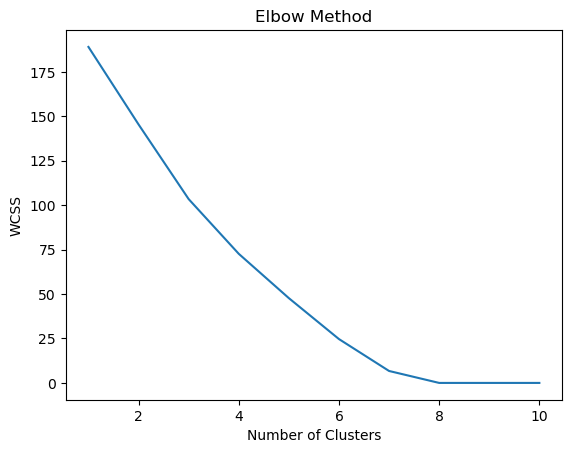

/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustered texts for column 'new_column_name': {0: ['h3_crop1cotton', 'h3_crop1paddy', 'h3_crop2cotton', 'h3_crop2paddy', 'h3_crop3cotton', 'h3_crop4cotton', 'h4_crop1cotton', 'h4_crop2cotton'], 1: ['h3_crop1cereal', 'h3_crop2cereal', 'h3_crop3cereal', 'h3_kgcrop1cereal', 'h4_crop1cereal', 'h4_crop2cereal'], 2: ['h3_crop1vegetable', 'h3_crop1oilseed', 'h3_crop1fruit', 'h3_crop2vegetable', 'h3_crop3vegetable', 'h3_crop4vegetable', 'h3_kgcrop1vegetable', 'h4_crop1vegetable', 'h4_crop4oilseed'], 3: ['h1_income_other_specify_reclassification', 'h3_crop1pulse', 'h3_crop1_losswhy___1', 'h3_crop1_losswhy___7', 'h3_crop2pulse', 'h3_crop3pulse', 'h2_income_other_specify_reclassification']}
Processing column: new_column_value


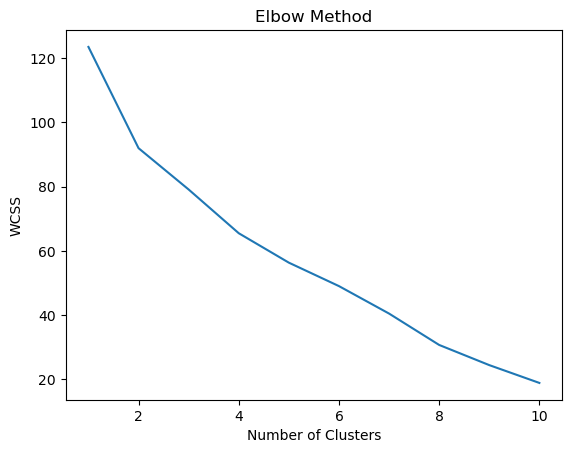

/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustered texts for column 'new_column_value': {0: ['Onion', 'Lemon', 'Brinjal', 'Corn', 'Sweet lime', 'Carrot', 'Castor', 'Jowar', 'Wheat', 'Beetroot', 'Ladyfinger', 'Cotton'], 1: ['h1_income_business_amt', 'h1_income_wages_amt', 'h1_income_govt_amt', 'h1_income_business_amt\n', 'h1_income_othagri_amt', 'Daniyalu', 'Bengalgram', 'BPT-5204', 'JJL', 'Horsegram', 'Sesamum', '1', 'Oodalu', 'h2_income_govt_amt', 'h2_income_business_amt', 'h2_income_wages_amt', 'Korra', 'Bottlegourd', 'other', 'Bitter gourd']}
Processing column: new_column_name.1
Not enough data to cluster in column 'new_column_name.1'.
Processing column: new_column_value.1


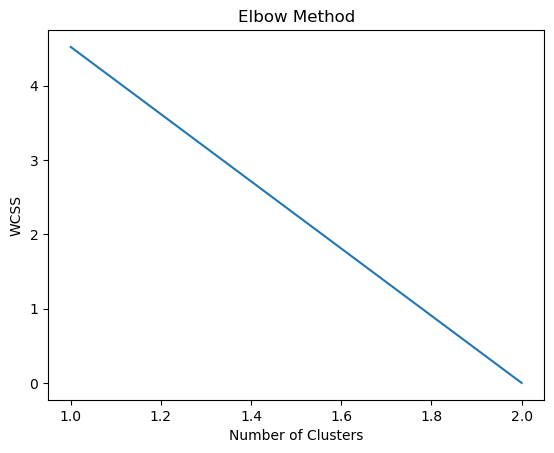

Clustered texts for column 'new_column_value.1': {0: ['Betel leaf', 'Chia seed']}
Processing column: delete_column_value
Not enough data to cluster in column 'delete_column_value'.


/Users/miaanand/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api
from gensim.models import Word2Vec
import gensim


def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def column_to_embeddings(df, column_name, model):
    texts = df[column_name].dropna().unique()
    embeddings = []
    for text in texts:
        words = gensim.utils.simple_preprocess(text)
        embeddings.append(get_average_word2vec(words, model))
    return texts, np.array(embeddings)

def find_optimal_clusters(embeddings, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(embeddings)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

df  # Replace with your actual file path

for column in df.columns:
    print(f"Processing column: {column}")
    texts, embeddings = column_to_embeddings(df, column, word2vec_model)
    num_unique_texts = len(texts)
    
    if num_unique_texts < 2:
        print(f"Not enough data to cluster in column '{column}'.")
        continue
    
    max_possible_clusters = min(num_unique_texts, 10)  # Dynamically set max clusters
    find_optimal_clusters(embeddings, max_clusters=max_possible_clusters)
    
    # Prompt for manual input or automate the selection based on the elbow plot
    optimal_clusters = int(input(f"Enter the optimal number of clusters for {column} (up to {max_possible_clusters}): "))
    
    if optimal_clusters <= 0 or optimal_clusters > max_possible_clusters:
        print("Invalid number of clusters. Skipping.")
        continue
    
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    
    # Grouping texts by their cluster labels
    clustered_texts = {}
    for label in np.unique(labels):
        clustered_texts[label] = texts[labels == label].tolist()
    
    # Here you can process your clustered texts as needed
    print(f"Clustered texts for column '{column}': {clustered_texts}")


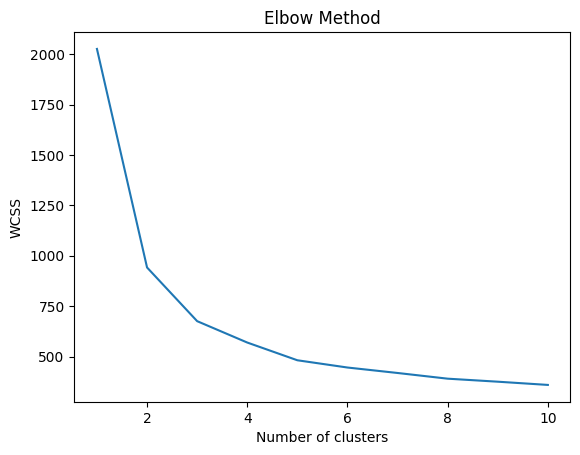

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Hypothetical embeddings array
# embeddings = [...]  # This would be replaced with your actual embeddings array

# Determine the optimal number of clusters
wcss = []  # Within cluster sum of squares
for i in range(1, 11):  # Trying different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()


In [38]:
optimal_clusters = 5
kmeans_final = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans_final.fit_predict(embeddings)

# Now, to group the original text values based on their cluster assignments and return something similar to the earlier lists
clustered_texts = {}
for i, cluster_label in enumerate(clusters):
    if cluster_label not in clustered_texts:
        clustered_texts[cluster_label] = [unique_values[i]]
    else:
        clustered_texts[cluster_label].append(unique_values[i])

# For simplicity and to align with previous tasks, choosing the first text in each cluster as the representative
suggested_replacements = {cluster_id: values for cluster_id, values in clustered_texts.items()}

suggested_replacements


{4: ['Tailoring',
  'Chakali ( battalu wash)',
  'Aakumachha tegulu',
  'Groundnut oil',
  'Vuddhulu',
  'Tractor& milk Dairy'],
 1: ['Driver',
  'Dairy',
  'RMP Docter',
  'Nimma',
  'Bengal gram',
  'Coriander',
  'Sona',
  'JJL',
  'Senaga',
  'Sweet lemon',
  'Mojaek thegulu',
  '28',
  'Jowar',
  'Godhuma',
  'Bollero',
  'Vudhulu',
  'Sabja',
  'Correct',
  'Kakara'],
 3: ['Ammavadi',
  'Lari Driver',
  'Contract worker',
  'Millets&bullero',
  'Lari',
  'Lari driver',
  'NREGS',
  'Chepalu pattadam',
  '24000',
  'Beedi',
  'Yaragadd',
  'Horsegram',
  'Senagalu',
  'Hursgram',
  'Sannimma',
  'Amudham',
  'Mokka jonna',
  'Mokaajonna',
  'No',
  'RMP Doctor',
  'Dhobi',
  'Kora',
  'Dosa',
  'Coriander leaves',
  'Korra',
  'Vakka chetlu',
  'Jonna',
  'Mokkajona',
  'Sreeram'],
 2: ['Travels',
  'Tractor',
  'Tailor',
  'Auto',
  'Brinjal',
  'Corn',
  'Sweet lemon 1',
  'Lemon',
  'Carrot',
  'Tons',
  'Betroot',
  'Angadi',
  'Laridriver'],
 0: ['Bullero (auto)',
  'Cloths I

Clearly, this method doesnt work out very well, but I think it's a good proof of concept. The reason it doesn't work very well is because of the fact that the BERT embeddings are general, and the data that we have here is very domain specific, so it's unable to recognize. I think if we utilize the embeddings of an ASR model or a language model that is trained on an Indian language dataset, then we can easily group together. I now try using indic-bert, which is an Indian language model


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-bert")
model = AutoModel.from_pretrained("ai4bharat/indic-bert")


In [ ]:
# Tokenize and encode the sentences for the model
inputs = tokenizer(unique_values, padding=True, truncation=True, return_tensors="pt", max_length=128)

# Generate embeddings
with torch.no_grad():
    outputs = model(**inputs)

embeddings = outputs.last_hidden_state.mean(dim=1).numpy()


In [49]:
optimal_clusters =6
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans_final.fit_predict(embeddings)
clustered_texts = {}
for i, cluster_label in enumerate(clusters):
    clustered_texts.setdefault(cluster_label, []).append(unique_values[i])

# Suggesting the first text as the representative for simplicity
suggested_replacements = {cluster_id: values for cluster_id, values in clustered_texts.items()}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
suggested_replacements

{5: ['Tailoring',
  'Lari Driver',
  'Lari driver',
  'RMP Docter',
  'Coriander',
  'JJL',
  'Lemon',
  'Sweet lemon',
  'Groundnut oil',
  'Vuddhulu',
  'Leady finger (benda)'],
 1: ['Driver',
  'Millets&bullero',
  'Lari',
  'Nimma',
  'Daniyalu',
  'Horsegram',
  'Senagalu',
  'Hursgram',
  'Carrot',
  'Jowar',
  'Laridriver',
  'Dosa',
  'Sabja',
  'Kakara'],
 2: ['Ammavadi',
  'NREGS',
  'Chepalu pattadam',
  'Beedi',
  'Yaragadd',
  'Dhaniyalu',
  'Pasuvula gaddi(sappa)',
  'Bengal gram',
  'Nuvulu',
  'Senaga',
  'Sannimma',
  'Pamaroja oil',
  'Amudham',
  'Aakumachha tegulu',
  'Verukullu thegulu',
  'Pogamanchu valana putha rarli poindi',
  'Kayakulllu thegulu',
  'Mojaek thegulu',
  'Mokka jonna',
  'Mokaajonna',
  'Avisha',
  'Paladairy',
  'Dhobi',
  'Vudhulu',
  'Korra',
  'Mokkajonna',
  'Vakka chetlu',
  'Mokkajona',
  'Mokajonna',
  'Mokaajona',
  'Bt cotton',
  'Sreeram'],
 4: ['Travels',
  'Dairy',
  'Tractor',
  'Tailor',
  'Auto',
  'Cloths Iron',
  'Track tar',
 